In [56]:
import sys
sys.path.append('preLIMinary/')
sys.path.append('/home-2/gsatopo1@jhu.edu/library/my_lim')
from lim import lim
import numpy as np
import astropy.units as u
from LIM_lightcone import paint_lightcone, make_survey, make_measurements
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d, interp2d
from scipy import integrate
import matplotlib
from scipy.optimize import curve_fit
import source.tools._utils as ut
import source.tools._vid_tools as vut
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import matplotlib.colors as clrs
import matplotlib.cm as cmap
import matplotlib.patches as patches
import copy
import pmesh

kitsune   = '#D9972F'
seiheki   = '#478384'
shuan     = '#740A00'
aonibi      = '#324356'
shion       = '#968ABD'
suoko     = '#B23E52'
shironeri    = '#FCFAF2'


colors = [suoko,seiheki,kitsune,'#79a43a',aonibi,shion,'#828282']
plt.rcParams['axes.prop_cycle'] = plt.cycler(color=colors)
plt.rcParams['lines.linewidth'] = 3.0
plt.rcParams['axes.linewidth'] = 2.
matplotlib.rc('font', **{'family': 'serif', 'serif': ['Computer Modern']})
matplotlib.rc('text', usetex=True)

In [57]:
koiai       = '#002E4E'
aiiro     = '#105779'
kujyaku   = '#008E74'
shuan     = '#740A00'
suo       = '#7E2639'
kitsune   = '#D9972F'
tamago    = '#FFDF85'
ominaeshi   = '#F2F2B0'
chojizome = '#DDB87E'
azuki     = '#A04940'
kitsune   = '#D9972F'
seiheki   = '#478384'
aonibi      = '#324356'
shion       = '#968ABD'



#map_blue = tri_map(koiai,aiiro,kujyaku)
#map_red = tri_map(shuan,suo,kitsune)

def tri_map(col1,col2,col3):
    cmap = clrs.LinearSegmentedColormap.from_list("", [col1,col2,col3])
    return cmap

def five_map(col1,col2,col3,col4,col5):
    cmap = clrs.LinearSegmentedColormap.from_list("", [col1,col2,col3,col4,col5])
    return cmap

map_blue = tri_map(koiai,kujyaku,ominaeshi)
map_red = tri_map(shuan,azuki,chojizome)#tamago)
map_br = five_map(koiai,seiheki,ominaeshi,kitsune,shuan)
map_br_3 = tri_map(koiai,ominaeshi,shuan)

def disptri(col1,col2,col3):
    f,axes = plt.subplots(figsize=(8,0.5), dpi=100,sharey=True)
    f.subplots_adjust(wspace=0,right=0.99,top=0.99,bottom=0.00,left=0.01,hspace=0.0)
    plt.yticks([])
    arr=np.tile(np.arange(1000),100).reshape(100,1000)
    cmap = tri_map(col1,col2,col3)
    plt.imshow(arr,cmap=cmap)
    
def disp5(col1,col2,col3,col4,col5):
    f,axes = plt.subplots(figsize=(8,0.5), dpi=100,sharey=True)
    f.subplots_adjust(wspace=0,right=0.99,top=0.99,bottom=0.00,left=0.01,hspace=0.0)
    plt.yticks([])
    arr=np.tile(np.arange(1000),100).reshape(100,1000)
    cmap = five_map(col1,col2,col3,col4,col5)
    plt.imshow(arr,cmap=cmap)

In [58]:
grey='#324356'
turquoise='#54858a'
#aqua='#5ca191'
yellow='#f0db92'
yellow_orange='#DDB87E'
orange='#C37854'


In [59]:
disptri(koiai,ominaeshi,shuan)
disp5(koiai,seiheki,ominaeshi,kitsune,shuan)
disp5(grey,turquoise,yellow, yellow_orange, orange)

RuntimeError: Failed to process string with tex because latex could not be found

<Figure size 800x50 with 1 Axes>

RuntimeError: Failed to process string with tex because latex could not be found

<Figure size 800x50 with 1 Axes>

RuntimeError: Failed to process string with tex because latex could not be found

<Figure size 800x50 with 1 Axes>

In [60]:
def Dnu_from_Dz(nu,z,Dz):
    nuObs = nu/(1.+z)
    zmin = z-Dz/2.
    zmax = z+Dz/2.
    nu_zmin = nu/(1.+zmin)
    nu_zmax = nu/(1.+zmax)
    return nuObs, abs(nu_zmin-nu_zmax)

def LC_params(do_exSFR, exSFR, exSFR_pars, Tsys):
    nu_CO=115.271*u.GHz
    z_min = 2.4
    z_max = 3.4
    model_params=dict(halo_lightcone_dir='/home/jlbernal/LightCone_S82_UM', 
                      lines=dict(CO=True),
                      models=dict(CO=dict(model_name='CO_Li16',
                                          model_pars={'alpha':0.7,'beta':4.5,'delta_mf':1,'sigma_L':0.3})),
                      do_external_SFR = do_exSFR, external_SFR = exSFR,
                      SFR_pars=exSFR_pars,
                      supersample=1,
                      Nmu=10,
                      dk=0.02*u.Mpc**-1)
    obs_params=dict(zmin = z_min-0.03, zmax = z_max+0.03,
                    RAObs_min=-10*u.deg,RAObs_max=10*u.deg,
                    DECObs_min=-10*u.deg,DECObs_max=10*u.deg,
                    RA_min=-10*u.deg,RA_max=10*u.deg,
                    DEC_min=-10*u.deg,DEC_max=10*u.deg,
                    nuObs_max=nu_CO/(1+z_min), nuObs_min=nu_CO/(1+z_max),
                    beam_FWHM=4*u.arcmin,
                    dnu=15.6*u.MHz,
                    Tsys=Tsys*u.K, 
                    Nfeeds=1000, 
                    tobs=10000*u.hr,
                    linear_VID_bin=False, Tmin_VID = 1.0e-4*u.uK,
                    do_smooth=True)
    obs_params.update(model_params)
    return obs_params

# example plot

In [61]:
nu_CO=115.271*u.GHz
zmin_CO = 4.9
zmax_CO = 5.1

CO=make_measurements(dict(halo_lightcone_dir='/home/jlbernal/LightCone_S82_UM',
                          lines=dict(CO_J10=True),
                          target_line = 'CO_J10',
                          models=dict(CO_J10=dict(model_name='CO_lines_scaling_LFIR',
                                              model_pars={'alpha':1.09,'alpha_std':0.04,'beta':-1,'beta_std':0.4,'sigma_L':0.3})),
                          do_external_SFR = False, external_SFR = '',
                          SFR_pars=dict(),
                          supersample=6,
                          Nmu=10,
                          dk=0.02*u.Mpc**-1,
                          zmin = zmin_CO-0.03, zmax = zmax_CO+0.03,
                          RAObs_min=-0.5*u.deg,RAObs_max=0.5*u.deg,
                          DECObs_min=-0.5*u.deg,DECObs_max=0.5*u.deg,
                          RA_min=-0.5*u.deg,RA_max=0.5*u.deg,
                          DEC_min=-0.5*u.deg,DEC_max=0.5*u.deg,
                          nuObs_max=nu_CO/(1+zmin_CO), nuObs_min=nu_CO/(1+zmax_CO),
                          beam_FWHM=4*u.arcmin,
                          dnu=31.25*u.MHz,
                          Tsys=0*u.K, 
                          Nfeeds=1000,
                          tobs=10000*u.hr,
                          linear_VID_bin=False, Tmin_VID = 1.0e-4*u.uK,
                          do_angular_smooth=True,
                          seed=1234,do_intensity=False,do_downsample=False))

nu_CII=1900.539*u.GHz
zmin_CII = 4.9
zmax_CII = 5.1
CII=make_measurements(dict(halo_lightcone_dir='/home/jlbernal/LightCone_S82_UM',
                          lines=dict(CII=True),
                           target_line = 'CII',
                          models=dict(CII=dict(model_name='CII_Lagache18',
                                               model_pars={'alpha1':1.4,'alpha2':0.07, 'beta1':7.1, 'beta2':0.07,'sigma_L':0.3})),
                           do_external_SFR = False, external_SFR = '',
                          SFR_pars=dict(),
                          supersample=6,
                          Nmu=10,
                          dk=0.02*u.Mpc**-1,
                          zmin = zmin_CII-0.03, zmax = zmax_CII+0.03,
                          RAObs_min=-0.5*u.deg,RAObs_max=0.5*u.deg,
                          DECObs_min=-0.5*u.deg,DECObs_max=0.5*u.deg,
                          RA_min=-0.5*u.deg,RA_max=0.5*u.deg,
                          DEC_min=-0.5*u.deg,DEC_max=0.5*u.deg,
                          nuObs_max=nu_CII/(1+zmin_CII), nuObs_min=nu_CII/(1+zmax_CII),
                          beam_FWHM=35*u.arcsec,
                          dnu=5.5*u.GHz,
                          Tsys=0*u.K, 
                          Nfeeds=1000,
                          tobs=10000*u.hr,
                          linear_VID_bin=False, Tmin_VID = 1.0e-4*u.uK,
                          do_angular_smooth=True,
                          seed=1234,do_intensity=True,do_downsample=False))

nu_Lya=2465398.5*u.GHz
zmin_Lya = 4.9
zmax_Lya = 5.1
Lya=make_measurements(dict(halo_lightcone_dir='/home/jlbernal/LightCone_S82_UM',
                          lines=dict(Lyalpha=True),
                           target_line = 'Lyalpha',
                          models=dict(Lyalpha=dict(model_name='Lyalpha_Chung19',model_pars={'C':1.6e42,'xi':1.6,'zeta':0.5,'psi':0.875,'z0':3.125,'f0':0.18,'SFR0':0.5,'sigma_L':0.3})),
                           do_external_SFR = False, external_SFR = '',
                          SFR_pars=dict(),
                          supersample=6,
                          Nmu=10,
                          dk=0.02*u.Mpc**-1,
                          zmin = zmin_Lya-0.03, zmax = zmax_Lya+0.03,
                          RAObs_min=-0.5*u.deg,RAObs_max=0.5*u.deg,
                          DECObs_min=-0.5*u.deg,DECObs_max=0.5*u.deg,
                          RA_min=-0.5*u.deg,RA_max=0.5*u.deg,
                          DEC_min=-0.5*u.deg,DEC_max=0.5*u.deg,
                          nuObs_max=nu_Lya/(1+zmin_Lya), nuObs_min=nu_Lya/(1+zmax_Lya),
                          beam_FWHM=6.2*u.arcsec,
                          dnu=17*u.THz,
                          Tsys=0*u.K, 
                          Nfeeds=1000,
                          tobs=10000*u.hr,
                          linear_VID_bin=False, Tmin_VID = 1.0e-4*u.uK,
                          do_angular_smooth=True,
                          mass=True,
                          seed=1234,do_intensity=True,do_downsample=False))

In [62]:
CO.update(supersample=10)

In [63]:
CO_map=CO.obs_3d_map
CII_map=CII.obs_3d_map
Lya_map=Lya.obs_3d_map

/home/jlbernal/LightCone_S82_UM/lightcone_MDPL2UM_214.fits
/home/jlbernal/LightCone_S82_UM/lightcone_MDPL2UM_215.fits
/home/jlbernal/LightCone_S82_UM/lightcone_MDPL2UM_216.fits
/home/jlbernal/LightCone_S82_UM/lightcone_MDPL2UM_214.fits
/home/jlbernal/LightCone_S82_UM/lightcone_MDPL2UM_215.fits
/home/jlbernal/LightCone_S82_UM/lightcone_MDPL2UM_216.fits
/home/jlbernal/LightCone_S82_UM/lightcone_MDPL2UM_214.fits
/home/jlbernal/LightCone_S82_UM/lightcone_MDPL2UM_215.fits
/home/jlbernal/LightCone_S82_UM/lightcone_MDPL2UM_216.fits


In [64]:

inds_RA = (Lya.halo_catalog['RA'] > Lya.RAObs_min.value)&(Lya.halo_catalog['RA'] < Lya.RAObs_max.value)
inds_DEC = (Lya.halo_catalog['DEC'] > Lya.DECObs_min.value)&(Lya.halo_catalog['DEC'] < Lya.DECObs_max.value)
inds_sky = inds_RA&inds_DEC

halos_survey = {}
#Loop over lines to see what halos are within nuObs
filt = 1e8
for line in Lya.lines.keys():
    if Lya.lines[line]:
        halos_survey[line] = dict(RA= np.array([]),DEC=np.array([]),Zobs=np.array([]),Ztrue=np.array([]),M_HALO=np.array([]),SM_HALO=np.array([]))
        #inds = (Lya.nuObs_line_halo[line] >= Lya.nuObs_min)&(Lya.nuObs_line_halo[line] <= Lya.nuObs_max)&inds_sky
        inds = (Lya.nuObs_line_halo[line] >= Lya.nuObs_min)&(Lya.nuObs_line_halo[line] <= Lya.nuObs_max)&inds_sky&(Lya.halo_catalog['M_HALO']>filt)
        halos_survey[line]['RA'] = np.append(halos_survey[line]['RA'],Lya.halo_catalog['RA'][inds])
        halos_survey[line]['DEC'] = np.append(halos_survey[line]['DEC'],Lya.halo_catalog['DEC'][inds])
        halos_survey[line]['Zobs'] = np.append(halos_survey[line]['Zobs'],(Lya.line_nu0[Lya.target_line]/Lya.nuObs_line_halo[line][inds]).decompose()-1)
        #Not doing DZ correction
        #halos_survey[line]['Ztrue'] = np.append(halos_survey[line]['Ztrue'],Lya.halo_catalog['Z'][inds]+Lya.halo_catalog['DZ'][inds])
        halos_survey[line]['Ztrue'] = np.append(halos_survey[line]['Ztrue'],Lya.halo_catalog['Z'][inds])
        halos_survey[line]['M_HALO'] = np.append(halos_survey[line]['M_HALO'],Lya.halo_catalog['M_HALO'][inds])
        halos_survey[line]['SM_HALO'] = np.append(halos_survey[line]['SM_HALO'],Lya.halo_catalog['SM_HALO'][inds])





In [65]:
plt.hist(np.log10(halos_survey['Lyalpha']['SM_HALO'])[np.isfinite(np.log10(halos_survey['Lyalpha']['SM_HALO']))],bins=100)
plt.show()

<ipython-input-65-4d0671641cf7>:1: RuntimeWarning: divide by zero encountered in log10
  plt.hist(np.log10(halos_survey['Lyalpha']['SM_HALO'])[np.isfinite(np.log10(halos_survey['Lyalpha']['SM_HALO']))],bins=100)


RuntimeError: Failed to process string with tex because latex could not be found

<Figure size 432x288 with 1 Axes>

In [66]:

inds_RA = (Lya.halo_catalog['RA'] > Lya.RAObs_min.value)&(Lya.halo_catalog['RA'] < Lya.RAObs_max.value)
inds_DEC = (Lya.halo_catalog['DEC'] > Lya.DECObs_min.value)&(Lya.halo_catalog['DEC'] < Lya.DECObs_max.value)
inds_sky = inds_RA&inds_DEC

filt_halos_survey = {}
#Loop over lines to see what halos are within nuObs
filt = 10**9.5
for line in Lya.lines.keys():
    if Lya.lines[line]:
        filt_halos_survey[line] = dict(RA= np.array([]),DEC=np.array([]),Zobs=np.array([]),Ztrue=np.array([]),M_HALO=np.array([]),SM_HALO=np.array([]))
        #inds = (Lya.nuObs_line_halo[line] >= Lya.nuObs_min)&(Lya.nuObs_line_halo[line] <= Lya.nuObs_max)&inds_sky
        inds = (Lya.nuObs_line_halo[line] >= Lya.nuObs_min)&(Lya.nuObs_line_halo[line] <= Lya.nuObs_max)&inds_sky&(Lya.halo_catalog['SM_HALO']>filt)
        filt_halos_survey[line]['RA'] = np.append(filt_halos_survey[line]['RA'],Lya.halo_catalog['RA'][inds])
        filt_halos_survey[line]['DEC'] = np.append(filt_halos_survey[line]['DEC'],Lya.halo_catalog['DEC'][inds])
        filt_halos_survey[line]['Zobs'] = np.append(filt_halos_survey[line]['Zobs'],(Lya.line_nu0[Lya.target_line]/Lya.nuObs_line_halo[line][inds]).decompose()-1)
        #Not doing DZ correction
        #filt_halos_survey[line]['Ztrue'] = np.append(filt_halos_survey[line]['Ztrue'],Lya.halo_catalog['Z'][inds]+Lya.halo_catalog['DZ'][inds])
        filt_halos_survey[line]['Ztrue'] = np.append(filt_halos_survey[line]['Ztrue'],Lya.halo_catalog['Z'][inds])
        filt_halos_survey[line]['M_HALO'] = np.append(filt_halos_survey[line]['M_HALO'],Lya.halo_catalog['M_HALO'][inds])
        filt_halos_survey[line]['SM_HALO'] = np.append(filt_halos_survey[line]['SM_HALO'],Lya.halo_catalog['SM_HALO'][inds])





In [67]:
def aniso_filter(k, v):
    '''
    Filter for k_perp and k_par modes separately.
    Applies to an nbodykit mesh object as a regular filter.
    Uses globally defined variables:
        sigma_perp - 'angular' smoothing in the flat sky approximation
        sigma_par - 'radial' smoothing from number of channels.
    Usage:
        mesh.apply(perp_filter, mode='complex', kind='wavenumber')
    NOTES:
    k[0] *= modifies the next iteration in the loop.
    Coordinates are fixed except for the k[1] which are
    the coordinate that sets what slab is being altered?
    '''
    rper = sigma_perp
    rpar = sigma_par
    newk = copy.deepcopy(k)

    #Smooth the k-modes anisotropically
    newk[0] *= rpar
    newk[1] *= rper
    newk[2] *= rper

    #Build smoothed values
    kk = sum(ki**2 for ki in newk)

    kk[kk==0]==1

    return np.exp(-0.5*kk)*v
def rd2tp(ra,dec):
    """ convert ra/dec to theta,phi"""

    phi = ra*np.pi/180
    
    theta = np.pi/180 * (90. - dec)
    return theta, phi

In [68]:
import dask.array as da
import astropy.units as u
import astropy.constants as cu
import pmesh
import copy
import pmesh
from nbodykit.source.mesh.catalog import CompensateCICShotnoise

In [69]:
#Define the mesh divisions and the box size
Nmesh = np.array([Lya.supersample*Lya.Nchan,
          Lya.supersample*Lya.Nside[0],
          Lya.supersample*Lya.Nside[1]], dtype=int)
Lbox = Lya.Lbox.value

ralim = np.deg2rad(np.array([Lya.RAObs_min.value,Lya.RAObs_max.value]))
declim = np.deg2rad(np.array([Lya.DECObs_min.value,Lya.DECObs_max.value]))
raside_lim = Lya.raside_lim
decside_lim = Lya.decside_lim
rside_obs_lim = Lya.rside_obs_lim

ramid = 0.5*(Lya.RAObs_max + Lya.RAObs_min)
decmid = 0.5*(Lya.DECObs_max + Lya.DECObs_min)

mins_obs = np.array([rside_obs_lim[0],raside_lim[0],decside_lim[0]])

gal_map = np.zeros([Nmesh[0],Nmesh[1],Nmesh[2]//2 + 1], dtype='complex64')

global sigma_par
global sigma_perp
# First, compute the intensity/temperature of each halo in the catalog we will include
for line in Lya.lines.keys():
    if Lya.lines[line]:
        #Get true cell volume
        zlims = (Lya.line_nu0[line].value)/np.array([Lya.nuObs_max.value,Lya.nuObs_min.value])-1
        rlim = ((Lya.cosmo.comoving_radial_distance(zlims)*u.Mpc).to(Lya.Mpch)).value
        #Get the side of the box
        if Lya.do_inner_cut:
            raside = 2*rlim[0]*np.tan(0.5*(ralim[1]-ralim[0]))
            decside = 2*rlim[0]*np.tan(0.5*(declim[1]-declim[0]))
            zside = rlim[1]*np.cos(max(0.5*(ralim[1]-ralim[0]),0.5*(declim[1]-declim[0])))-rlim[0]
            rside_lim = np.array([rlim[0],rlim[0]+zside])
        else:
            raside = 2*rlim[1]*np.tan(0.5*(ralim[1]-ralim[0]))
            decside = 2*rlim[1]*np.tan(0.5*(declim[1]-declim[0]))
            zside = rlim[1]-rlim[0]*np.cos(max(0.5*(ralim[1]-ralim[0]),0.5*(declim[1]-declim[0])))
            rside_lim = np.array([rlim[1]-zside,rlim[1]])

        Lbox_true = np.array([zside,raside,decside])
        Vcell_true = (Lbox_true/Nmesh).prod()*(Lya.Mpch**3).to(Lya.Mpch**3)
        #Get positions using the observed redshift
        #Convert the halo position in each volume to Cartesian coordinates (from Nbodykit)
        ra,dec,redshift = da.broadcast_arrays(halos_survey[line]['RA'], halos_survey[line]['DEC'],
                                              halos_survey[line]['Zobs'])

        #Shift the ra and dec of the halo such that they are centered in (0,0)
        ra -= ramid.value
        dec -= decmid.value

        ra,dec  = da.deg2rad(ra),da.deg2rad(dec)

        # cartesian coordinates
        x = da.cos(dec) * da.cos(ra)
        y = da.cos(dec) * da.sin(ra)
        z = da.sin(dec)
        pos = da.vstack([x,y,z]).T
        #radial distances in Mpch/h
        r = redshift.map_blocks(lambda zz: (((Lya.cosmo.comoving_radial_distance(zz)*u.Mpc).to(Lya.Mpch)).value),
                                dtype=redshift.dtype)
        cartesian_halopos = r[:,None] * pos
        lategrid = np.array(cartesian_halopos.compute())
        #Filter some halos out if outside of the inner cut
        if Lya.do_inner_cut:
            filtering = (lategrid[:,0] >= rside_lim[0]) & (lategrid[:,0] < rside_lim[1]) & \
                        (lategrid[:,1] >= raside_lim[0]) & (lategrid[:,1] < raside_lim[1]) & \
                        (lategrid[:,2] >= decside_lim[0]) & (lategrid[:,2] < decside_lim[1])
            lategrid = lategrid[filtering]
            #Compute the signal in each voxel (with Ztrue and Vcell_true)
            Zhalo = halos_survey[line]['Ztrue'][filtering]
            Hubble = Lya.cosmo.hubble_parameter(Zhalo)*(u.km/u.Mpc/u.s)
            
        else:
            Zhalo = halos_survey[line]['Ztrue']
            Hubble = Lya.cosmo.hubble_parameter(Zhalo)*(u.km/u.Mpc/u.s)
            
        #Locate the grid such that bottom left corner of the box is [0,0,0] which is the nbodykit convention.
        mins = np.array([rside_lim[0],raside_lim[0],decside_lim[0]])
        for n in range(3):
            lategrid[:,n] -= mins[n]
        #Set the emitter in the grid and paint using pmesh directly instead of nbk
        pm = pmesh.pm.ParticleMesh(Nmesh, BoxSize=Lbox, dtype='float32', resampler='cic')
        #Make realfield object
        field = pm.create(type='real')
        layout = pm.decompose(lategrid)
        #Exchange positions between different MPI ranks
        p = layout.exchange(lategrid)
        #Assign weights following the layout of particles
        pm.paint(p, out=field, mass=1, resampler='cic')
        
        #Fourier transform fields and apply the filter
        field = field.r2c()
        #This smoothing comes from the resolution window function.
        #if Lya.do_smooth:
        #    #compute scales for the anisotropic filter (in Ztrue -> zmid)
        #    zmid = (Lya.line_nu0[line]/Lya.nuObs_mean).decompose().value-1
        #    sigma_par = (cu.c*Lya.dnu*(1+zmid)/(Lya.cosmo.hubble_parameter(zmid)*(u.km/u.Mpc/u.s)*Lya.nuObs_mean)).to(Lya.Mpch).value
        #    sigma_perp = (Lya.cosmo.comoving_radial_distance(zmid)*u.Mpc*(Lya.beam_width/(1*u.rad))).to(Lya.Mpch).value
        #    field = field.apply(aniso_filter, kind='wavenumber')
        #Add this contribution to the total gal_map
        gal_map+=field

gal_map = gal_map.c2r()
#maps += np.abs(np.min(maps)) 
gal_map = gal_map-gal_map.cmean()

In [70]:
#Define the mesh divisions and the box size
Nmesh = np.array([Lya.supersample*Lya.Nchan,
          Lya.supersample*Lya.Nside[0],
          Lya.supersample*Lya.Nside[1]], dtype=int)
Lbox = Lya.Lbox.value

ralim = np.deg2rad(np.array([Lya.RAObs_min.value,Lya.RAObs_max.value]))
declim = np.deg2rad(np.array([Lya.DECObs_min.value,Lya.DECObs_max.value]))
raside_lim = Lya.raside_lim
decside_lim = Lya.decside_lim
rside_obs_lim = Lya.rside_obs_lim

ramid = 0.5*(Lya.RAObs_max + Lya.RAObs_min)
decmid = 0.5*(Lya.DECObs_max + Lya.DECObs_min)

mins_obs = np.array([rside_obs_lim[0],raside_lim[0],decside_lim[0]])

filt_gal_map = np.zeros([Nmesh[0],Nmesh[1],Nmesh[2]//2 + 1], dtype='complex64')

global sigma_par
global sigma_perp
# First, compute the intensity/temperature of each halo in the catalog we will include
for line in Lya.lines.keys():
    if Lya.lines[line]:
        #Get true cell volume
        zlims = (Lya.line_nu0[line].value)/np.array([Lya.nuObs_max.value,Lya.nuObs_min.value])-1
        rlim = ((Lya.cosmo.comoving_radial_distance(zlims)*u.Mpc).to(Lya.Mpch)).value
        #Get the side of the box
        if Lya.do_inner_cut:
            raside = 2*rlim[0]*np.tan(0.5*(ralim[1]-ralim[0]))
            decside = 2*rlim[0]*np.tan(0.5*(declim[1]-declim[0]))
            zside = rlim[1]*np.cos(max(0.5*(ralim[1]-ralim[0]),0.5*(declim[1]-declim[0])))-rlim[0]
            rside_lim = np.array([rlim[0],rlim[0]+zside])
        else:
            raside = 2*rlim[1]*np.tan(0.5*(ralim[1]-ralim[0]))
            decside = 2*rlim[1]*np.tan(0.5*(declim[1]-declim[0]))
            zside = rlim[1]-rlim[0]*np.cos(max(0.5*(ralim[1]-ralim[0]),0.5*(declim[1]-declim[0])))
            rside_lim = np.array([rlim[1]-zside,rlim[1]])

        Lbox_true = np.array([zside,raside,decside])
        Vcell_true = (Lbox_true/Nmesh).prod()*(Lya.Mpch**3).to(Lya.Mpch**3)
        #Get positions using the observed redshift
        #Convert the halo position in each volume to Cartesian coordinates (from Nbodykit)
        ra,dec,redshift = da.broadcast_arrays(filt_halos_survey[line]['RA'], filt_halos_survey[line]['DEC'],
                                              filt_halos_survey[line]['Zobs'])

        #Shift the ra and dec of the halo such that they are centered in (0,0)
        ra -= ramid.value
        dec -= decmid.value

        ra,dec  = da.deg2rad(ra),da.deg2rad(dec)

        # cartesian coordinates
        x = da.cos(dec) * da.cos(ra)
        y = da.cos(dec) * da.sin(ra)
        z = da.sin(dec)
        pos = da.vstack([x,y,z]).T
        #radial distances in Mpch/h
        r = redshift.map_blocks(lambda zz: (((Lya.cosmo.comoving_radial_distance(zz)*u.Mpc).to(Lya.Mpch)).value),
                                dtype=redshift.dtype)
        cartesian_halopos = r[:,None] * pos
        lategrid = np.array(cartesian_halopos.compute())
        #Filter some halos out if outside of the inner cut
        if Lya.do_inner_cut:
            filtering = (lategrid[:,0] >= rside_lim[0]) & (lategrid[:,0] < rside_lim[1]) & \
                        (lategrid[:,1] >= raside_lim[0]) & (lategrid[:,1] < raside_lim[1]) & \
                        (lategrid[:,2] >= decside_lim[0]) & (lategrid[:,2] < decside_lim[1])
            lategrid = lategrid[filtering]
            #Compute the signal in each voxel (with Ztrue and Vcell_true)
            Zhalo = filt_halos_survey[line]['Ztrue'][filtering]
            Hubble = Lya.cosmo.hubble_parameter(Zhalo)*(u.km/u.Mpc/u.s)
            
        else:
            Zhalo = filt_halos_survey[line]['Ztrue']
            Hubble = Lya.cosmo.hubble_parameter(Zhalo)*(u.km/u.Mpc/u.s)
            
        #Locate the grid such that bottom left corner of the box is [0,0,0] which is the nbodykit convention.
        mins = np.array([rside_lim[0],raside_lim[0],decside_lim[0]])
        for n in range(3):
            lategrid[:,n] -= mins[n]
        #Set the emitter in the grid and paint using pmesh directly instead of nbk
        pm = pmesh.pm.ParticleMesh(Nmesh, BoxSize=Lbox, dtype='float32', resampler='cic')
        #Make realfield object
        field = pm.create(type='real')
        layout = pm.decompose(lategrid)
        #Exchange positions between different MPI ranks
        p = layout.exchange(lategrid)
        #Assign weights following the layout of particles
        pm.paint(p, out=field, mass=1, resampler='cic')
        
        #Fourier transform fields and apply the filter
        field = field.r2c()
        #This smoothing comes from the resolution window function.
        #if Lya.do_smooth:
        #    #compute scales for the anisotropic filter (in Ztrue -> zmid)
        #    zmid = (Lya.line_nu0[line]/Lya.nuObs_mean).decompose().value-1
        #    sigma_par = (cu.c*Lya.dnu*(1+zmid)/(Lya.cosmo.hubble_parameter(zmid)*(u.km/u.Mpc/u.s)*Lya.nuObs_mean)).to(Lya.Mpch).value
        #    sigma_perp = (Lya.cosmo.comoving_radial_distance(zmid)*u.Mpc*(Lya.beam_width/(1*u.rad))).to(Lya.Mpch).value
        #    field = field.apply(aniso_filter, kind='wavenumber')
        #Add this contribution to the total filt_gal_map
        filt_gal_map+=field

filt_gal_map = filt_gal_map.c2r()
#maps += np.abs(np.min(maps)) 
filt_gal_map = filt_gal_map-filt_gal_map.cmean()

In [71]:
ralim=np.asarray([CO.RAObs_min.value,CO.RAObs_max.value])
declim=np.asarray([CO.DECObs_min.value,CO.DECObs_max.value])
z_plot=np.asarray([CO.zmin, CO.zmax])
ra,dec  = np.deg2rad(ralim),np.deg2rad(declim)
x = np.cos(dec) * np.cos(ra)
y = np.cos(dec) * np.sin(ra)
z = np.sin(dec)
pos_lims = np.vstack([x,y,z]).T

r = ((CO.cosmo.comoving_radial_distance(z_plot)*u.Mpc).to(CO.Mpch)).value
grid_lim = r[:,None]*pos_lims

x=np.linspace(0, grid_lim[1,1]- grid_lim[0,1], CO.supersample*CO.Nside[0])
y=np.linspace(0, grid_lim[1,2]-grid_lim[0,2], CO.supersample*CO.Nside[1])

In [72]:

gs_plot = gridspec.GridSpec(1, 4,left=0.05,bottom=0.02,right=0.95,top=0.98,wspace=.1,hspace=.0)
fig = plt.figure(figsize=(16,4))

ax = plt.subplot(gs_plot[0,0])
norm = clrs.TwoSlopeNorm(vcenter=0)
ax.imshow(gal_map.preview(axes=[2,1]), extent=[x[0],x[-1], y[-1], y[0]], cmap=map_br,norm=norm,aspect='auto')
#plt.xlabel('Mpc/h')
ax.text(89,5,'All gal', bbox=dict(boxstyle="round",facecolor='white', alpha=0.9),ha='right',fontsize=17,va='top')
ax.text(5,5,r'$z=5$', bbox=dict(boxstyle="round",facecolor='white', alpha=0.9),ha='left',fontsize=17,va='top')
ax.set_xticks([])
ax.set_yticks([])
rside = x[-1]-x[0]
side = rside/10
cent = 5+side+3
ax.text(cent,y[-1]-5,'0.2 deg\n', color=aonibi,weight='bold',ha='center',va='bottom',fontsize=15,bbox=dict(boxstyle="round",facecolor='white', alpha=0.9))
ax.errorbar(cent,y[-1]-8,xerr=side,marker='',ls='--',c=aonibi,elinewidth=5,capsize=7,capthick=5,zorder=10)

ax = plt.subplot(gs_plot[0,1])
norm = clrs.TwoSlopeNorm(vcenter=0)
ax.imshow(filt_gal_map.preview(axes=[2,1]), extent=[x[0],x[-1], y[-1], y[0]], cmap=map_br,norm=norm,aspect='auto')
#plt.xlabel('Mpc/h')
ax.text(89,5,'Obs Gal', bbox=dict(boxstyle="round",facecolor='white', alpha=0.9),ha='right',fontsize=17,va='top')
ax.set_xticks([])
ax.set_yticks([])

ax = plt.subplot(gs_plot[0,2])
norm = clrs.TwoSlopeNorm(vcenter=0)
ax.imshow(CO_map.preview(axes=[2,1]), extent=[x[0],x[-1], y[-1], y[0]], cmap=map_br,norm=norm,aspect='auto')
#plt.xlabel('Mpc/h')
ax.text(89,5,'CO(1-0)', bbox=dict(boxstyle="round",facecolor='white', alpha=0.9),ha='right',fontsize=17,va='top')
ax.text(5,5,r'$\nu_{\rm obs}=$'+'${:.1f}$ GHz'.format(0.5*(CO.nuObs_max+CO.nuObs_min).value), bbox=dict(boxstyle="round",facecolor='white', alpha=0.9),ha='left',fontsize=17,va='top')
ax.set_xticks([])
ax.set_yticks([])

ax = plt.subplot(gs_plot[0,3])
norm = clrs.TwoSlopeNorm(vcenter=0)
ax.imshow(CII_map.preview(axes=[2,1]), extent=[x[0],x[-1], y[-1], y[0]], cmap=map_br,norm=norm,aspect='auto')
#plt.xlabel('Mpc/h')
ax.text(89,5,'CII', bbox=dict(boxstyle="round",facecolor='white', alpha=0.9),ha='right',fontsize=17,va='top')
ax.text(5,5,r'$\nu_{\rm obs}=$'+'${:.1f}$ GHz'.format(0.5*(CII.nuObs_max+CII.nuObs_min).value), bbox=dict(boxstyle="round",facecolor='white', alpha=0.9),ha='left',fontsize=17,va='top')
ax.set_xticks([])
ax.set_yticks([])

plt.tight_layout()
plt.savefig('LIM_maps.png', dpi=100)
plt.show()

<ipython-input-72-2296254526bd>:44: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


RuntimeError: Failed to process string with tex because latex could not be found

RuntimeError: Failed to process string with tex because latex could not be found

<Figure size 1152x288 with 4 Axes>

# Interloper plot

In [6]:
zmin,zmax = 0.8,7.52
nu_CII=1900.539*u.GHz
zmin_CIIobs,zmax_CIIobs = 6.5,7.5
LC=make_measurements(dict(halo_lightcone_dir='/home/jlbernal/LightCone_S82_UM',
                          lines=dict(CO_J43=True),
                          target_line = 'CII',
                          models=dict(CO_J43=dict(model_name='CO_lines_scaling_LFIR',
                                              model_pars={'alpha':1.09,'alpha_std':0.05,'beta':1.2,'beta_std':0.4,'sigma_L':0.3})),
                          do_external_SFR = False, external_SFR = '',
                          SFR_pars=dict(),
                          supersample=10,
                          Nmu=20,
                          dk=0.02*u.Mpc**-1,
                          zmin = zmin, zmax = zmax,
                          RAObs_min=-0.5*u.deg,RAObs_max=0.5*u.deg,
                          DECObs_min=-0.5*u.deg,DECObs_max=0.5*u.deg,
                          RA_min=-0.5*u.deg,RA_max=0.5*u.deg,
                          DEC_min=-0.5*u.deg,DEC_max=0.5*u.deg,
                          nuObs_max=nu_CII/(1+zmin_CIIobs), nuObs_min=nu_CII/(1+zmax_CIIobs),
                          beam_FWHM=55*u.arcsec,
                          dnu=2.2*u.GHz,
                          Tsys=0*u.K, 
                          Nfeeds=1000,
                          tobs=10000*u.hr,
                          linear_VID_bin=False, Tmin_VID = 1.0e-4*u.uK,
                          do_angular_smooth=True,
                         seed=1234,do_intensity=True,do_downsample=False,do_remove_mean=False))


### Get quantities

In [7]:
CO_J43_map=LC.obs_3d_map
PkCO_J43=LC.Pk_0
kCO_J43=LC.k_Pk_poles

CO_J43_map_lowgrade = copy.copy(LC.obs_3d_map.r2c())
pm_noise = pmesh.pm.ParticleMesh(np.array([LC.Nchan,LC.Nside[0],LC.Nside[1]], dtype=int),
                                        BoxSize=LC.Lbox.value, dtype='float32', resampler='cic')
CO_J43_map_lowgrade = pm_noise.downsample(CO_J43_map_lowgrade.c2r(),keep_mean=True)

/home/jlbernal/LightCone_S82_UM/lightcone_MDPL2UM_78.fits
/home/jlbernal/LightCone_S82_UM/lightcone_MDPL2UM_79.fits
/home/jlbernal/LightCone_S82_UM/lightcone_MDPL2UM_80.fits
/home/jlbernal/LightCone_S82_UM/lightcone_MDPL2UM_81.fits
/home/jlbernal/LightCone_S82_UM/lightcone_MDPL2UM_82.fits
/home/jlbernal/LightCone_S82_UM/lightcone_MDPL2UM_83.fits
/home/jlbernal/LightCone_S82_UM/lightcone_MDPL2UM_84.fits
/home/jlbernal/LightCone_S82_UM/lightcone_MDPL2UM_85.fits
/home/jlbernal/LightCone_S82_UM/lightcone_MDPL2UM_86.fits
/home/jlbernal/LightCone_S82_UM/lightcone_MDPL2UM_87.fits
/home/jlbernal/LightCone_S82_UM/lightcone_MDPL2UM_88.fits
/home/jlbernal/LightCone_S82_UM/lightcone_MDPL2UM_89.fits
/home/jlbernal/LightCone_S82_UM/lightcone_MDPL2UM_90.fits
/home/jlbernal/LightCone_S82_UM/lightcone_MDPL2UM_91.fits
/home/jlbernal/LightCone_S82_UM/lightcone_MDPL2UM_92.fits
/home/jlbernal/LightCone_S82_UM/lightcone_MDPL2UM_93.fits
/home/jlbernal/LightCone_S82_UM/lightcone_MDPL2UM_94.fits
/home/jlbernal

/home/jlbernal/LightCone_S82_UM/lightcone_MDPL2UM_218.fits
/home/jlbernal/LightCone_S82_UM/lightcone_MDPL2UM_219.fits
/home/jlbernal/LightCone_S82_UM/lightcone_MDPL2UM_220.fits
/home/jlbernal/LightCone_S82_UM/lightcone_MDPL2UM_221.fits
/home/jlbernal/LightCone_S82_UM/lightcone_MDPL2UM_222.fits
/home/jlbernal/LightCone_S82_UM/lightcone_MDPL2UM_223.fits
/home/jlbernal/LightCone_S82_UM/lightcone_MDPL2UM_224.fits
/home/jlbernal/LightCone_S82_UM/lightcone_MDPL2UM_225.fits
/home/jlbernal/LightCone_S82_UM/lightcone_MDPL2UM_226.fits
/home/jlbernal/LightCone_S82_UM/lightcone_MDPL2UM_227.fits
/home/jlbernal/LightCone_S82_UM/lightcone_MDPL2UM_228.fits
/home/jlbernal/LightCone_S82_UM/lightcone_MDPL2UM_229.fits
/home/jlbernal/LightCone_S82_UM/lightcone_MDPL2UM_230.fits
/home/jlbernal/LightCone_S82_UM/lightcone_MDPL2UM_231.fits
/home/jlbernal/LightCone_S82_UM/lightcone_MDPL2UM_232.fits
/home/jlbernal/LightCone_S82_UM/lightcone_MDPL2UM_233.fits
/home/jlbernal/LightCone_S82_UM/lightcone_MDPL2UM_234.fi

In [8]:
Nbins=50
Ie_COJ43 = np.logspace(-2,np.log10(np.quantile(CO_J43_map_lowgrade,0.998)),Nbins+1)*LC.unit       
Ii_COJ43 = 0.5*(Ie_COJ43[:-1]+Ie_COJ43[1:])
VID_COJ43 = np.histogram(CO_J43_map_lowgrade.value.flatten(),
                            bins=Ie_COJ43.value)[0]

In [9]:
LC.update(lines=dict(CO_J65=True),
          models=dict(CO_J65=dict(model_name='CO_lines_scaling_LFIR',
                                  model_pars={'alpha':1.04,'alpha_std':0.033,'beta':2.2,'beta_std':0.2,'sigma_L':0.3})))


In [10]:
CO_J65_map=LC.obs_3d_map
PkCO_J65=LC.Pk_0
kCO_J65=LC.k_Pk_poles

CO_J65_map_lowgrade = copy.copy(LC.obs_3d_map.r2c())
pm_noise = pmesh.pm.ParticleMesh(np.array([LC.Nchan,LC.Nside[0],LC.Nside[1]], dtype=int),
                                        BoxSize=LC.Lbox.value, dtype='float32', resampler='cic')
CO_J65_map_lowgrade = pm_noise.downsample(CO_J65_map_lowgrade.c2r(),keep_mean=True)

In [11]:
Nbins=50
Ie_COJ65 = np.logspace(-2,np.log10(np.quantile(CO_J65_map_lowgrade,0.998)),Nbins+1)*LC.unit       
Ii_COJ65 = 0.5*(Ie_COJ65[:-1]+Ie_COJ65[1:])
VID_COJ65 = np.histogram(CO_J65_map_lowgrade.value.flatten(),
                            bins=Ie_COJ65.value)[0]

In [12]:
LC.update(lines=dict(CII=True),
        models=dict(CII=dict(model_name='CII_Lagache18',
        model_pars={'alpha1':1.4,'alpha2':0.07, 'beta1':7.1, 'beta2':0.07,'sigma_L':0.3})))

In [13]:
CII_map=LC.obs_3d_map
PkCII=LC.Pk_0
kCII=LC.k_Pk_poles

CII_map_lowgrade = copy.copy(LC.obs_3d_map.r2c())
pm_noise = pmesh.pm.ParticleMesh(np.array([LC.Nchan,LC.Nside[0],LC.Nside[1]], dtype=int),
                                        BoxSize=LC.Lbox.value, dtype='float32', resampler='cic')
CII_map_lowgrade = pm_noise.downsample(CII_map_lowgrade.c2r(),keep_mean=True)

In [14]:
Nbins=50
Ie_CII = np.logspace(0,np.log10(np.quantile(CII_map_lowgrade,0.998)),Nbins+1)*LC.unit       
Ii_CII = 0.5*(Ie_CII[:-1]+Ie_CII[1:])
VID_CII = np.histogram(CII_map_lowgrade.value.flatten(),
                            bins=Ie_CII.value)[0]

In [15]:
LC.update(lines=dict(CO_J65=True,CO_J43=True,CII=True),
          models=dict(CO_J65=dict(model_name='CO_lines_scaling_LFIR',
                                  model_pars={'alpha':1.04,'alpha_std':0.033,'beta':2.2,'beta_std':0.2,'sigma_L':0.3}),
                      CII=dict(model_name='CII_Lagache18',
                      model_pars={'alpha1':1.4,'alpha2':0.07, 'beta1':7.1, 'beta2':0.07,'sigma_L':0.3}),
                      CO_J43=dict(model_name='CO_lines_scaling_LFIR',
                                              model_pars={'alpha':1.09,'alpha_std':0.05,'beta':1.2,'beta_std':0.4,'sigma_L':0.3})))


In [16]:
ALL_map=LC.obs_3d_map
PkALL=LC.Pk_0
kALL=LC.k_Pk_poles

ALL_map_lowgrade = copy.copy(LC.obs_3d_map.r2c())
pm_noise = pmesh.pm.ParticleMesh(np.array([LC.Nchan,LC.Nside[0],LC.Nside[1]], dtype=int),
                                        BoxSize=LC.Lbox.value, dtype='float32', resampler='cic')
ALL_map_lowgrade = pm_noise.downsample(ALL_map_lowgrade.c2r(),keep_mean=True)

In [17]:
Nbins=50
Ie_ALL = np.logspace(0,np.log10(np.quantile(ALL_map_lowgrade,0.998)),Nbins+1)*LC.unit       
Ii_ALL = 0.5*(Ie_ALL[:-1]+Ie_ALL[1:])
VID_ALL = np.histogram(ALL_map_lowgrade.value.flatten(),
                            bins=Ie_ALL.value)[0]
VID_CII_ALL = np.histogram(CII_map_lowgrade.value.flatten(),
                            bins=Ie_ALL.value)[0]

### Make the plots

In [18]:
ralim=np.asarray([LC.RAObs_min.value,LC.RAObs_max.value])
declim=np.asarray([LC.DECObs_min.value,LC.DECObs_max.value])
z_plot=np.asarray([zmin_CIIobs,zmax_CIIobs])
ra,dec  = np.deg2rad(ralim),np.deg2rad(declim)
x = np.cos(dec) * np.cos(ra)
y = np.cos(dec) * np.sin(ra)
z = np.sin(dec)
pos_lims = np.vstack([x,y,z]).T

r = ((LC.cosmo.comoving_radial_distance(z_plot)*u.Mpc).to(LC.Mpch)).value
grid_lim = r[:,None]*pos_lims

x=np.linspace(0, grid_lim[1,1]- grid_lim[0,1], LC.supersample*LC.Nside[0])
y=np.linspace(0, grid_lim[1,2]-grid_lim[0,2], LC.supersample*LC.Nside[1])

<ipython-input-39-f34c8ee686b6>:129: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


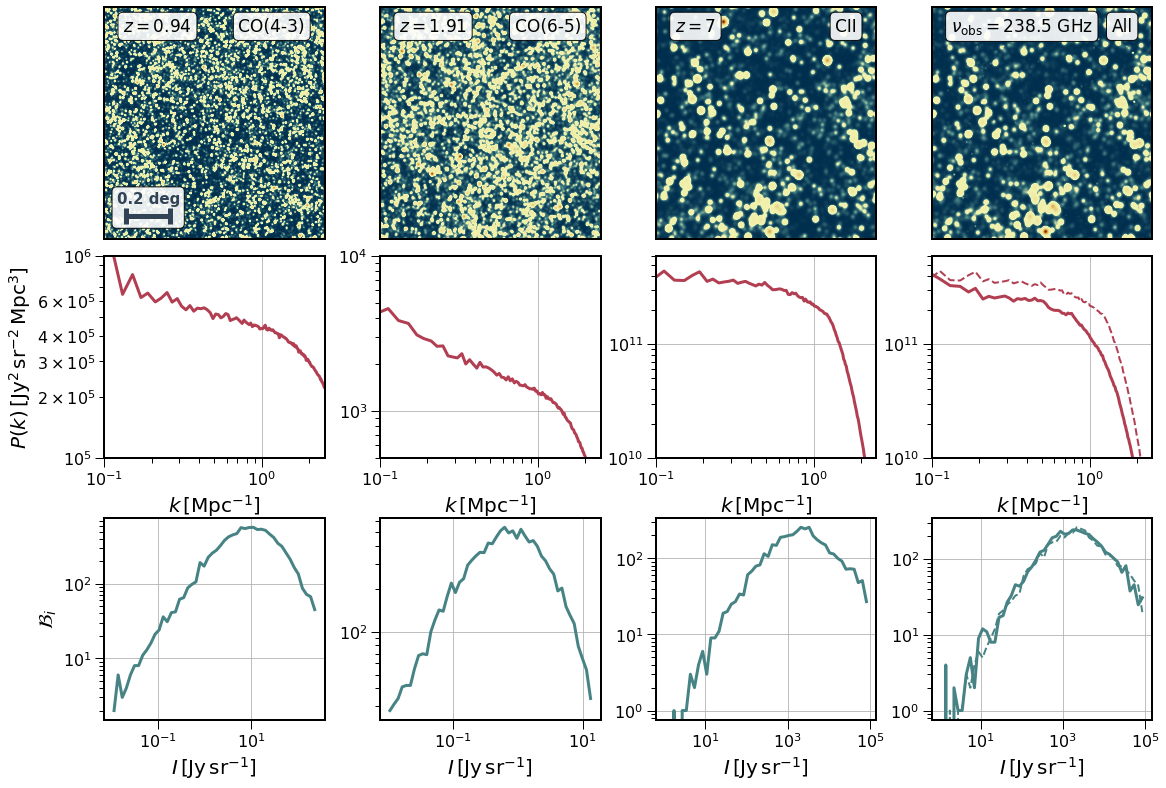

In [39]:
gs_plot = gridspec.GridSpec(2, 4,left=0.07,bottom=0.08,right=0.98,top=0.98,
                            wspace=.25,hspace=.05,height_ratios=[1,2])
fig = plt.figure(figsize=(16,11))

######## MAPS ########

ax = plt.subplot(gs_plot[0,0])
norm = clrs.TwoSlopeNorm(vcenter=0)
ax.imshow(CO_J43_map.preview(axes=[2,1]), extent=[x[0],x[-1], y[-1], y[0]], cmap=map_br,norm=norm,aspect='auto')
#plt.xlabel('Mpc/h')
ax.text(95,11,'CO(4-3)', bbox=dict(boxstyle="round",facecolor='white', alpha=0.9),ha='right',fontsize=17)
ax.text(9,11,r'$z=0.94$', bbox=dict(boxstyle="round",facecolor='white', alpha=0.9),ha='left',fontsize=17)
ax.set_xticks([])
ax.set_yticks([])
rside = x[-1]-x[0]
side = rside/10
cent = 5+side+3
ax.text(cent,y[-1]-5,'0.2 deg\n', color=aonibi,weight='bold',ha='center',va='bottom',fontsize=15,bbox=dict(boxstyle="round",facecolor='white', alpha=0.9))
ax.errorbar(cent,y[-1]-8,xerr=side,marker='',ls='--',c=aonibi,elinewidth=5,capsize=7,capthick=5,zorder=10)
#rside = x[-1]-x[0]
#cent = rside/5
#side = rside/10
#ax.errorbar(cent,y[-1]-7,xerr=side,marker='',ls='--',c=shironeri,elinewidth=5,capsize=10,capthick=5)
#ax.text(cent,y[-1]-10,r'0.2 deg', color=shironeri,weight='bold',ha='center',va='bottom')

ax = plt.subplot(gs_plot[0,1])
norm = clrs.TwoSlopeNorm(vcenter=0)
ax.imshow(CO_J65_map.preview(axes=[2,1]), extent=[x[0],x[-1], y[-1], y[0]], cmap=map_br,norm=norm,aspect='auto')
#plt.xlabel('Mpc/h')
ax.text(95,11,'CO(6-5)', bbox=dict(boxstyle="round",facecolor='white', alpha=0.9),ha='right',fontsize=17)
ax.text(9,11,r'$z=1.91$', bbox=dict(boxstyle="round",facecolor='white', alpha=0.9),ha='left',fontsize=17)
ax.set_xticks([])
ax.set_yticks([])


ax = plt.subplot(gs_plot[0,2])
norm = clrs.TwoSlopeNorm(vcenter=0)
ax.imshow(CII_map.preview(axes=[2,1]), extent=[x[0],x[-1], y[-1], y[0]], cmap=map_br,norm=norm,aspect='auto')
#plt.xlabel('Mpc/h')
ax.text(95,11,'CII', bbox=dict(boxstyle="round",facecolor='white', alpha=0.9),ha='right',fontsize=17)
ax.text(9,11,r'$z=7$', bbox=dict(boxstyle="round",facecolor='white', alpha=0.9),ha='left',fontsize=17)
ax.set_xticks([])
ax.set_yticks([])

ax = plt.subplot(gs_plot[0,3])
norm = clrs.TwoSlopeNorm(vcenter=0)
ax.imshow(ALL_map.preview(axes=[2,1]), extent=[x[0],x[-1], y[-1], y[0]], cmap=map_br,norm=norm,aspect='auto')
#plt.xlabel('Mpc/h')
ax.text(95,11,'All', bbox=dict(boxstyle="round",facecolor='white', alpha=0.9),ha='right',fontsize=17)
ax.text(9,11,r'$\nu_{\rm obs}=$'+'${:.1f}$ GHz'.format(0.5*(LC.nuObs_max+LC.nuObs_min).value), bbox=dict(boxstyle="round",facecolor='white', alpha=0.9),ha='left',fontsize=17)
ax.set_xticks([])
ax.set_yticks([])

######## PK ########

gs_plot2 = gridspec.GridSpecFromSubplotSpec(2, 4, subplot_spec=gs_plot[1,:],hspace=0.3,wspace=0.25)

ax = plt.subplot(gs_plot2[0,0])
ax.loglog(kCO_J43.to(u.Mpc**-1), PkCO_J43.to(LC.unit**2*u.Mpc**3))
ax.tick_params(axis='both',width=1,length=9,labelsize=16)
ax.tick_params(axis='both',which='minor',width=1,length=5,labelsize=16)
ax.grid()
ax.set_xlim(0.1,2.5)
ax.set_ylim(1e5,1e6)
ax.set_xlabel(r'$k\,[{\rm Mpc^{-1}}]$',fontsize=20)
ax.set_ylabel(r'$P(k)\,[{\rm Jy^2\,sr^{-2}\,Mpc^{3}}]$',fontsize=20)

ax = plt.subplot(gs_plot2[0,1])
ax.loglog(kCO_J65.to(u.Mpc**-1), PkCO_J65.to(LC.unit**2*u.Mpc**3))
ax.tick_params(axis='both',width=1,length=9,labelsize=16)
ax.tick_params(axis='both',which='minor',width=1,length=5,labelsize=16)
ax.set_xlim(0.1,2.5)
ax.set_ylim(5e2,1e4)
ax.grid()
ax.set_xlabel(r'$k\,[{\rm Mpc^{-1}}]$',fontsize=20)

ax = plt.subplot(gs_plot2[0,2])
ax.loglog(kCII.to(u.Mpc**-1), PkCII.to(LC.unit**2*u.Mpc**3))
ax.tick_params(axis='both',width=1,length=9,labelsize=16)
ax.tick_params(axis='both',which='minor',width=1,length=5,labelsize=16)
ax.set_xlim(0.1,2.5)
ax.set_ylim(1e10,6e11)
ax.grid()
ax.set_xlabel(r'$k\,[{\rm Mpc^{-1}}]$',fontsize=20)

ax = plt.subplot(gs_plot2[0,3])
ax.loglog(kALL.to(u.Mpc**-1), PkALL.to(LC.unit**2*u.Mpc**3))
ax.loglog(kCII.to(u.Mpc**-1), PkCII.to(LC.unit**2*u.Mpc**3),lw=2,ls='--',color=colors[0])
ax.tick_params(axis='both',width=1,length=9,labelsize=16)
ax.tick_params(axis='both',which='minor',width=1,length=5,labelsize=16)
ax.set_xlim(0.1,2.5)
ax.set_ylim(1e10,6e11)
ax.grid()
ax.set_xlabel(r'$k\,[{\rm Mpc^{-1}}]$',fontsize=20)

######## VID #######

ax = plt.subplot(gs_plot2[1,0])
ax.loglog(Ii_COJ43, VID_COJ43,color=colors[1])
ax.tick_params(axis='both',width=1,length=9,labelsize=16)
ax.tick_params(axis='both',which='minor',width=1,length=5,labelsize=16)
ax.grid()
ax.set_xlabel(r'$I\,[{\rm Jy\,sr^{-1}}]$',fontsize=20)
ax.set_ylabel(r'$\mathcal{B}_i$',fontsize=20)

ax = plt.subplot(gs_plot2[1,1])
ax.loglog(Ii_COJ65, VID_COJ65,color=colors[1])
ax.tick_params(axis='both',width=1,length=9,labelsize=16)
ax.tick_params(axis='both',which='minor',width=1,length=5,labelsize=16)
ax.grid()
ax.set_xlabel(r'$I\,[{\rm Jy\,sr^{-1}}]$',fontsize=20)

ax = plt.subplot(gs_plot2[1,2])
ax.loglog(Ii_CII, VID_CII,color=colors[1])
ax.tick_params(axis='both',width=1,length=9,labelsize=16)
ax.tick_params(axis='both',which='minor',width=1,length=5,labelsize=16)
ax.grid()
ax.set_xlabel(r'$I\,[{\rm Jy\,sr^{-1}}]$',fontsize=20)

ax = plt.subplot(gs_plot2[1,3])
ax.loglog(Ii_ALL, VID_ALL,color=colors[1])
ax.loglog(Ii_ALL, VID_CII_ALL,color=colors[1],lw=2,ls='--')

ax.tick_params(axis='both',width=1,length=9,labelsize=16)
ax.tick_params(axis='both',which='minor',width=1,length=5,labelsize=16)
ax.grid()
ax.set_xlabel(r'$I\,[{\rm Jy\,sr^{-1}}]$',fontsize=20)

plt.tight_layout()
plt.savefig('LIM_interloper_maps.png', dpi=100)
plt.show()

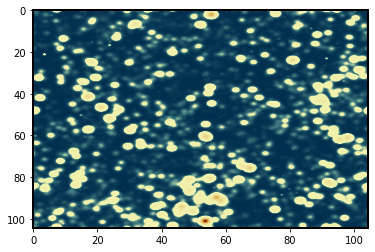

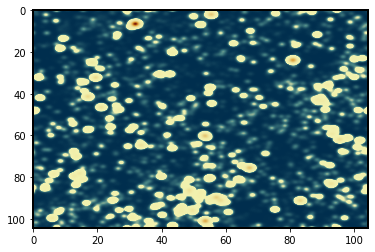

In [27]:
norm = clrs.TwoSlopeNorm(vcenter=0)
plt.imshow((ALL_map-np.mean(ALL_map)).preview(axes=[2,1]), extent=[x[0],x[-1], y[-1], y[0]], cmap=map_br,norm=norm,aspect='auto')
plt.show()
norm = clrs.TwoSlopeNorm(vcenter=0)
plt.imshow((CII_map-np.mean(CII_map)).preview(axes=[2,1]), extent=[x[0],x[-1], y[-1], y[0]], cmap=map_br,norm=norm,aspect='auto')
plt.show()

In [197]:
CO_J43_map.preview(axes=[2,1])
plt.show()

array([[  22.755516, 1429.5217  , 3808.8088  , ..., -160.58624 ,
        -246.24307 , -245.16576 ],
       [-244.89465 ,  556.9852  , 1935.5895  , ..., -174.34436 ,
         -36.75921 , -201.15775 ],
       [-297.90955 ,   69.610176,  899.9127  , ..., -156.27101 ,
         192.39024 ,  -72.28958 ],
       ...,
       [ 118.079185,  -83.95428 , -170.55472 , ..., -279.24908 ,
        -402.875   , -173.5139  ],
       [ 884.5363  ,  297.93707 , -116.601326, ..., -418.69058 ,
        -378.00687 ,  209.12885 ],
       [ 582.09955 ,  847.16754 , 1630.1234  , ..., -302.89478 ,
        -323.61548 ,   38.462925]], dtype=float32)

In [28]:
CII_map/(CO_J43_map+CO_J65_map+CII_map)

/home/jlbernal/.conda/envs/py3/lib/python3.8/site-packages/pmesh/pm.py:188: RuntimeWarning: divide by zero encountered in true_divide
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/jlbernal/.conda/envs/py3/lib/python3.8/site-packages/pmesh/pm.py:188: RuntimeWarning: invalid value encountered in true_divide
  result = getattr(ufunc, method)(*inputs, **kwargs)


RealField:array([[[ 2.8379428e+00,  4.2760870e+02, -2.6706390e+00, ...,
          1.1593071e+00,  1.3103060e+00,  1.6507313e+00],
        [ 2.7542677e-02,  4.2959128e-02,  3.9975015e-03, ...,
          1.1528856e+00,  2.0768738e+00, -4.5992184e-01],
        [ 4.1386625e-01,  2.9453853e-01,  1.9135432e-01, ...,
          1.3446320e+00,  4.5165226e-01,  5.1351672e-01],
        ...,
        [ 1.7342563e+00,  1.5553261e+00,  1.3907490e+00, ...,
          1.4652114e+00,  1.6780879e+00,  1.7956657e+00],
        [ 1.5861373e+00,  1.5435798e+00,  1.4811854e+00, ...,
          1.3145787e+00,  1.4614123e+00,  1.5693099e+00],
        [ 1.7343875e+00,  2.0088835e+00,  2.4501150e+00, ...,
          1.2418448e+00,  1.3842964e+00,  1.5476018e+00]],

       [[ 1.0029831e+00,  1.0047362e+00,  1.0044374e+00, ...,
          1.0260593e+00,  1.0118498e+00,  1.0027683e+00],
        [ 1.0341748e+00,  1.0225055e+00,  1.0103621e+00, ...,
          1.0668896e+00,  1.0564027e+00,  1.0470349e+00],
        [ 1.100

In [22]:
np.mean(ALL_map)/np.mean(CII_map)

0.9322858

In [21]:
np.mean(CII_map)

1238.7247

In [48]:
ALL_map/(CO_J43_map+CO_J65_map+CII_map)

RealField:array([[[0.9272819 , 0.9272846 , 0.92728734, ..., 0.92727524,
         0.92727715, 0.9272794 ],
        [0.9272853 , 0.9272885 , 0.9272917 , ..., 0.92727757,
         0.9272797 , 0.9272823 ],
        [0.92728573, 0.9272892 , 0.9272928 , ..., 0.927278  ,
         0.9272801 , 0.92728275],
        ...,
        [0.92728   , 0.9272817 , 0.92728317, ..., 0.92727506,
         0.9272766 , 0.92727834],
        [0.92728114, 0.9272829 , 0.9272848 , ..., 0.92727566,
         0.9272774 , 0.92727935],
        [0.9272816 , 0.92728364, 0.9272856 , ..., 0.92727625,
         0.927278  , 0.9272798 ]],

       [[0.9272766 , 0.92727566, 0.9272745 , ..., 0.92727685,
         0.92727715, 0.9272771 ],
        [0.92727697, 0.9272763 , 0.9272753 , ..., 0.9272767 ,
         0.92727727, 0.92727727],
        [0.9272761 , 0.92727536, 0.92727435, ..., 0.92727596,
         0.9272763 , 0.92727643],
        ...,
        [0.9272744 , 0.92727274, 0.92727107, ..., 0.9272779 ,
         0.9272772 , 0.927276  ],
  

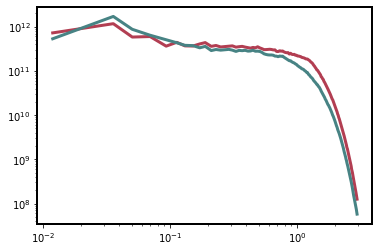

In [24]:
plt.loglog(kCII.to(u.Mpc**-1), PkCII.to(LC.unit**2*u.Mpc**3))
plt.loglog(kALL.to(u.Mpc**-1), PkALL.to(LC.unit**2*u.Mpc**3)/0.9322858**2)


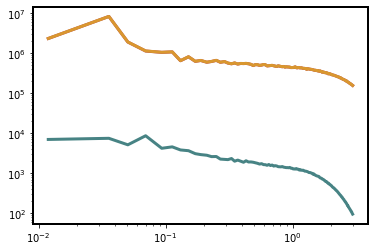

In [47]:
plt.loglog(kCO_J43.to(u.Mpc**-1), PkCO_J43.to(LC.unit**2*u.Mpc**3))
plt.loglog(kCO_J65.to(u.Mpc**-1), PkCO_J65.to(LC.unit**2*u.Mpc**3))
plt.loglog(kCO_J65.to(u.Mpc**-1), PkCO_J65.to(LC.unit**2*u.Mpc**3)+PkCO_J43.to(LC.unit**2*u.Mpc**3))
#plt.loglog(kCII.to(u.Mpc**-1), PkCII.to(LC.unit**2*u.Mpc**3))
#plt.loglog(kALL.to(u.Mpc**-1), PkALL.to(LC.unit**2*u.Mpc**3))
#plt.loglog(kALL.to(u.Mpc**-1), PkCO_J43.to(LC.unit**2*u.Mpc**3)+PkCO_J65.to(LC.unit**2*u.Mpc**3)+PkCII.to(LC.unit**2*u.Mpc**3))
#plt.ylim(1e10,1e13)


In [ ]:

VID_COJ43 = np.histogram(CO_J43_map.flatten(),
                            bins=self.Ti_edge.value)[0]

In [13]:
LC.update(lines=dict(CO_J65=True),
          models=dict(CO_J65=dict(model_name='CO_lines_scaling_LFIR',
                                  model_pars={'alpha':1.04,'alpha_std':0.033,'beta':2.2,'beta_std':0.2,'sigma_L':0.3})))


In [14]:
CO_J43_map=LC.obs_3d_map


{'CO_J65': True}

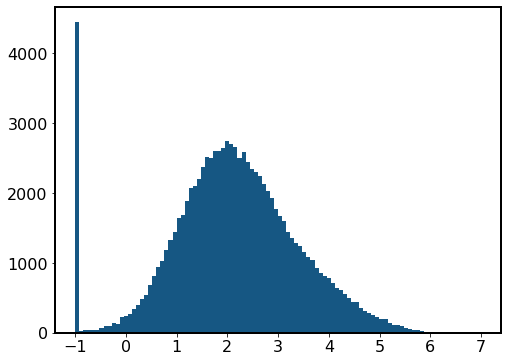

In [32]:
plt.hist(np.log10(LC.halos_in_survey['CO_J43']['Lhalo'].value+0.1),bins=100)
plt.show()

In [76]:
LC.lines

{'CO_J65': True, 'CO_J43': True, 'CII': True}

In [156]:
#Define the mesh divisions and the box size
Nmesh = np.array([LC.supersample*LC.Nchan,
          LC.supersample*LC.Nside[0],
          LC.supersample*LC.Nside[1]], dtype=int)
Lbox = LC.Lbox.value

ralim = np.deg2rad(np.array([LC.RAObs_min.value,LC.RAObs_max.value]))
declim = np.deg2rad(np.array([LC.DECObs_min.value,LC.DECObs_max.value]))
raside_lim = LC.raside_lim
decside_lim = LC.decside_lim
rside_obs_lim = LC.rside_obs_lim

ramid = 0.5*(LC.RAObs_max + LC.RAObs_min)
decmid = 0.5*(LC.DECObs_max + LC.DECObs_min)

mins_obs = np.array([rside_obs_lim[0],raside_lim[0],decside_lim[0]])

global sigma_par
global sigma_perp
maps = np.zeros([Nmesh[0],Nmesh[1],Nmesh[2]//2 + 1], dtype='complex64')


# First, compute the intensity/temperature of each halo in the catalog we will include
for line in LC.lines.keys():
    if line == 'CII':

        print('a')
        #Get true cell volume
        zlims = (LC.line_nu0[line].value)/np.array([LC.nuObs_max.value,LC.nuObs_min.value])-1
        rlim = ((LC.cosmo.comoving_radial_distance(zlims)*u.Mpc).to(LC.Mpch)).value
        #Get the side of the box
        if LC.do_inner_cut:
            raside = 2*rlim[0]*np.tan(0.5*(ralim[1]-ralim[0]))
            decside = 2*rlim[0]*np.tan(0.5*(declim[1]-declim[0]))
            zside = rlim[1]*np.cos(max(0.5*(ralim[1]-ralim[0]),0.5*(declim[1]-declim[0])))-rlim[0]
            rside_lim = np.array([rlim[0],rlim[0]+zside])
        else:
            raside = 2*rlim[1]*np.tan(0.5*(ralim[1]-ralim[0]))
            decside = 2*rlim[1]*np.tan(0.5*(declim[1]-declim[0]))
            zside = rlim[1]-rlim[0]*np.cos(max(0.5*(ralim[1]-ralim[0]),0.5*(declim[1]-declim[0])))
            rside_lim = np.array([rlim[1]-zside,rlim[1]])

        Lbox_true = np.array([zside,raside,decside])
        Vcell_true = (Lbox_true/Nmesh).prod()*(LC.Mpch**3).to(LC.Mpch**3)
        #Get positions using the observed redshift
        #Convert the halo position in each volume to Cartesian coordinates (from Nbodykit)
        ra,dec,redshift = da.broadcast_arrays(LC.halos_in_survey[line]['RA'], LC.halos_in_survey[line]['DEC'],
                                              LC.halos_in_survey[line]['Zobs'])

        #Shift the ra and dec of the halo such that they are centered in (0,0)
        ra -= ramid.value
        dec -= decmid.value

        ra,dec  = da.deg2rad(ra),da.deg2rad(dec)

        # cartesian coordinates
        x = da.cos(dec) * da.cos(ra)
        y = da.cos(dec) * da.sin(ra)
        z = da.sin(dec)
        pos = da.vstack([x,y,z]).T
        #radial distances in Mpch/h
        r = redshift.map_blocks(lambda zz: (((LC.cosmo.comoving_radial_distance(zz)*u.Mpc).to(LC.Mpch)).value),
                                dtype=redshift.dtype)
        cartesian_halopos = r[:,None] * pos
        lategrid = np.array(cartesian_halopos.compute())
        #Filter some halos out if outside of the inner cut
        if LC.do_inner_cut:
            filtering = (lategrid[:,0] >= rside_obs_lim[0]) & (lategrid[:,0] < rside_obs_lim[1]) & \
                        (lategrid[:,1] >= raside_lim[0]) & (lategrid[:,1] < raside_lim[1]) & \
                        (lategrid[:,2] >= decside_lim[0]) & (lategrid[:,2] < decside_lim[1])
            lategrid = lategrid[filtering]
            #Compute the signal in each voxel (with Ztrue and Vcell_true)
            Zhalo = LC.halos_in_survey[line]['Ztrue'][filtering]
            Hubble = LC.cosmo.hubble_parameter(Zhalo)*(u.km/u.Mpc/u.s)
            if LC.do_intensity:
                #intensity[Jy/sr]
                signal = (cu.c/(4.*np.pi*LC.line_nu0[line]*Hubble*(1.*u.sr))*LC.halos_in_survey[line]['Lhalo'][filtering]/Vcell_true).to(LC.unit)
            else:
                #Temperature[uK]
                signal = (cu.c**3*(1+Zhalo)**2/(8*np.pi*cu.k_B*LC.line_nu0[line]**3*Hubble)*LC.halos_in_survey[line]['Lhalo'][filtering]/Vcell_true).to(LC.unit)
        else:
            Zhalo = LC.halos_in_survey[line]['Ztrue']
            Hubble = LC.cosmo.hubble_parameter(Zhalo)*(u.km/u.Mpc/u.s)
            if LC.do_intensity:
                #intensity[Jy/sr]
                signal = (cu.c/(4.*np.pi*LC.line_nu0[line]*Hubble*(1.*u.sr))*LC.halos_in_survey[line]['Lhalo']/Vcell_true).to(LC.unit)
            else:
                #Temperature[uK]
                signal = (cu.c**3*(1+Zhalo)**2/(8*np.pi*cu.k_B*LC.line_nu0[line]**3*Hubble)*LC.halos_in_survey[line]['Lhalo']/Vcell_true).to(LC.unit)
        #Locate the grid such that bottom left corner of the box is [0,0,0] which is the nbodykit convention.
        mins = np.array([rside_obs_lim[0],raside_lim[0],decside_lim[0]])
        for n in range(3):
            lategrid[:,n] -= mins[n]
        #Set the emitter in the grid and paint using pmesh directly instead of nbk
        pm = pmesh.pm.ParticleMesh(Nmesh, BoxSize=Lbox, dtype='float32', resampler='cic')
        #Make realfield object
        field = pm.create(type='real')
        layout = pm.decompose(lategrid)
        #Exchange positions between different MPI ranks
        p = layout.exchange(lategrid)
        #Assign weights following the layout of particles
        m = layout.exchange(signal.value)
        if LC.mass:
            pm.paint(p, out=field, mass=1, resampler='cic')
        else: 
            pm.paint(p, out=field, mass=m, resampler='cic')
        #Fourier transform fields and apply the filter
        field = field.r2c()
        #This smoothing comes from the resolution window function.
        if LC.do_spectral_smooth or LC.do_angular_smooth:
            #compute scales for the anisotropic filter (in Ztrue -> zmid)
            zmid = (LC.line_nu0[line]/LC.nuObs_mean).decompose().value-1
            sigma_par = LC.do_spectral_smooth*(cu.c*LC.dnu*(1+zmid)/(LC.cosmo.hubble_parameter(zmid)*(u.km/u.Mpc/u.s)*LC.nuObs_mean)).to(LC.Mpch).value
            sigma_perp = LC.do_angular_smooth*(LC.cosmo.comoving_radial_distance(zmid)*u.Mpc*(LC.beam_width/(1*u.rad))).to(LC.Mpch).value
            field = field.apply(aniso_filter, kind='wavenumber')
        #Add this contribution to the total maps
        maps+=field

a


In [124]:
LC.lines

{'CII': True}

In [130]:
#Define the mesh divisions and the box size
Nmesh = np.array([LC.supersample*LC.Nchan,
          LC.supersample*LC.Nside[0],
          LC.supersample*LC.Nside[1]], dtype=int)
Lbox = LC.Lbox.value

ralim = np.deg2rad(np.array([LC.RAObs_min.value,LC.RAObs_max.value]))
declim = np.deg2rad(np.array([LC.DECObs_min.value,LC.DECObs_max.value]))
raside_lim = LC.raside_lim
decside_lim = LC.decside_lim
rside_obs_lim = LC.rside_obs_lim

ramid = 0.5*(LC.RAObs_max + LC.RAObs_min)
decmid = 0.5*(LC.DECObs_max + LC.DECObs_min)

mins_obs = np.array([rside_obs_lim[0],raside_lim[0],decside_lim[0]])

global sigma_par
global sigma_perp
maps = np.zeros([Nmesh[0],Nmesh[1],Nmesh[2]//2 + 1], dtype='complex64')


# First, compute the intensity/temperature of each halo in the catalog we will include
for line in LC.lines.keys():
    if LC.lines[line]:
        print(line)
        #Get true cell volume
        zlims = (LC.line_nu0[line].value)/np.array([LC.nuObs_max.value,LC.nuObs_min.value])-1
        rlim = ((LC.cosmo.comoving_radial_distance(zlims)*u.Mpc).to(LC.Mpch)).value
        #Get the side of the box
        if LC.do_inner_cut:
            raside = 2*rlim[0]*np.tan(0.5*(ralim[1]-ralim[0]))
            decside = 2*rlim[0]*np.tan(0.5*(declim[1]-declim[0]))
            zside = rlim[1]*np.cos(max(0.5*(ralim[1]-ralim[0]),0.5*(declim[1]-declim[0])))-rlim[0]
            rside_lim = np.array([rlim[0],rlim[0]+zside])
        else:
            raside = 2*rlim[1]*np.tan(0.5*(ralim[1]-ralim[0]))
            decside = 2*rlim[1]*np.tan(0.5*(declim[1]-declim[0]))
            zside = rlim[1]-rlim[0]*np.cos(max(0.5*(ralim[1]-ralim[0]),0.5*(declim[1]-declim[0])))
            rside_lim = np.array([rlim[1]-zside,rlim[1]])

        Lbox_true = np.array([zside,raside,decside])
        Vcell_true = (Lbox_true/Nmesh).prod()*(LC.Mpch**3).to(LC.Mpch**3)
        #Get positions using the observed redshift
        #Convert the halo position in each volume to Cartesian coordinates (from Nbodykit)
        ra,dec,redshift = da.broadcast_arrays(LC.halos_in_survey[line]['RA'], LC.halos_in_survey[line]['DEC'],
                                              LC.halos_in_survey[line]['Zobs'])

        #Shift the ra and dec of the halo such that they are centered in (0,0)
        ra -= ramid.value
        dec -= decmid.value

        ra,dec  = da.deg2rad(ra),da.deg2rad(dec)

        # cartesian coordinates
        x = da.cos(dec) * da.cos(ra)
        y = da.cos(dec) * da.sin(ra)
        z = da.sin(dec)
        pos = da.vstack([x,y,z]).T
        #radial distances in Mpch/h
        r = redshift.map_blocks(lambda zz: (((LC.cosmo.comoving_radial_distance(zz)*u.Mpc).to(LC.Mpch)).value),
                                dtype=redshift.dtype)
        cartesian_halopos = r[:,None] * pos
        lategrid = np.array(cartesian_halopos.compute())
        #Filter some halos out if outside of the inner cut
        if LC.do_inner_cut:
            filtering = (lategrid[:,0] >= rside_obs_lim[0]) & (lategrid[:,0] < rside_obs_lim[1]) & \
                        (lategrid[:,1] >= raside_lim[0]) & (lategrid[:,1] < raside_lim[1]) & \
                        (lategrid[:,2] >= decside_lim[0]) & (lategrid[:,2] < decside_lim[1])
            lategrid = lategrid[filtering]
            #Compute the signal in each voxel (with Ztrue and Vcell_true)
            Zhalo = LC.halos_in_survey[line]['Ztrue'][filtering]
            Hubble = LC.cosmo.hubble_parameter(Zhalo)*(u.km/u.Mpc/u.s)
            if LC.do_intensity:
                #intensity[Jy/sr]
                signal = (cu.c/(4.*np.pi*LC.line_nu0[line]*Hubble*(1.*u.sr))*LC.halos_in_survey[line]['Lhalo'][filtering]/Vcell_true).to(LC.unit)
            else:
                #Temperature[uK]
                signal = (cu.c**3*(1+Zhalo)**2/(8*np.pi*cu.k_B*LC.line_nu0[line]**3*Hubble)*LC.halos_in_survey[line]['Lhalo'][filtering]/Vcell_true).to(LC.unit)
        else:
            Zhalo = LC.halos_in_survey[line]['Ztrue']
            Hubble = LC.cosmo.hubble_parameter(Zhalo)*(u.km/u.Mpc/u.s)
            if LC.do_intensity:
                #intensity[Jy/sr]
                signal = (cu.c/(4.*np.pi*LC.line_nu0[line]*Hubble*(1.*u.sr))*LC.halos_in_survey[line]['Lhalo']/Vcell_true).to(LC.unit)
            else:
                #Temperature[uK]
                signal = (cu.c**3*(1+Zhalo)**2/(8*np.pi*cu.k_B*LC.line_nu0[line]**3*Hubble)*LC.halos_in_survey[line]['Lhalo']/Vcell_true).to(LC.unit)
        #Locate the grid such that bottom left corner of the box is [0,0,0] which is the nbodykit convention.
        mins = np.array([rside_obs_lim[0],raside_lim[0],decside_lim[0]])
        for n in range(3):
            lategrid[:,n] -= mins[n]
        #Set the emitter in the grid and paint using pmesh directly instead of nbk
        pm = pmesh.pm.ParticleMesh(Nmesh, BoxSize=Lbox, dtype='float32', resampler='cic')
        #Make realfield object
        field = pm.create(type='real')
        layout = pm.decompose(lategrid)
        #Exchange positions between different MPI ranks
        p = layout.exchange(lategrid)
        #Assign weights following the layout of particles
        m = layout.exchange(signal.value)
        if LC.mass:
            pm.paint(p, out=field, mass=1, resampler='cic')
        else: 
            pm.paint(p, out=field, mass=m, resampler='cic')
        #Fourier transform fields and apply the filter
        field = field.r2c()
        #This smoothing comes from the resolution window function.
        if LC.do_spectral_smooth or LC.do_angular_smooth:
            #compute scales for the anisotropic filter (in Ztrue -> zmid)
            zmid = (LC.line_nu0[line]/LC.nuObs_mean).decompose().value-1
            sigma_par = LC.do_spectral_smooth*(cu.c*LC.dnu*(1+zmid)/(LC.cosmo.hubble_parameter(zmid)*(u.km/u.Mpc/u.s)*LC.nuObs_mean)).to(LC.Mpch).value
            sigma_perp = LC.do_angular_smooth*(LC.cosmo.comoving_radial_distance(zmid)*u.Mpc*(LC.beam_width/(1*u.rad))).to(LC.Mpch).value
            field = field.apply(aniso_filter, kind='wavenumber')
        #Add this contribution to the total maps
        maps+=field

CII


In [157]:
aaa = maps.c2r()
bbb = aaa - aaa.cmean()

In [92]:
from nbodykit.algorithms import FFTPower


In [104]:
LC.update(lines=dict(CII=True),
        models=dict(CII=dict(model_name='CII_Lagache18',
        model_pars={'alpha1':1.4,'alpha2':0.07, 'beta1':7.1, 'beta2':0.07,'sigma_L':0.3})))

In [140]:
pk2d_cii=LC.Pk_2d


In [158]:
pk2d = FFTPower(aaa, '2d', Nmu=LC.Nmu, poles=[0,2,4], los=[1,0,0],
                                dk=LC.dk.to(LC.Mpch**-1).value,kmin=LC.kmin.to(LC.Mpch**-1).value,
                                kmax=LC.kmax.to(LC.Mpch**-1).value,BoxSize=LC.Lbox.value)
#pk2d_b = FFTPower(bbb, '2d', Nmu=LC.Nmu, poles=[0,2,4], los=[1,0,0],
#                                dk=LC.dk.to(LC.Mpch**-1).value,kmin=LC.kmin.to(LC.Mpch**-1).value,
#                                kmax=LC.kmax.to(LC.Mpch**-1).value,BoxSize=LC.Lbox.value)

(100000000.0, 10000000000000.0)

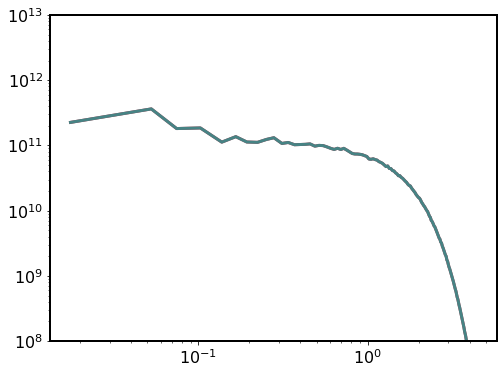

In [159]:
plt.loglog(pk2d.poles['k'],pk2d.poles['power_0'].real)
#plt.loglog(pk2d_b.poles['k'],pk2d_b.poles['power_0'].real)
plt.loglog(pk2d_cii.poles['k'],pk2d_cii.poles['power_0'].real)

plt.ylim(1e8,1e13)

In [100]:
len(LC.halos_in_survey['CO_J43']['Lhalo'][LC.halos_in_survey['CO_J43']['Lhalo'].value>0])

89665

In [130]:
raside

34.556905063357505

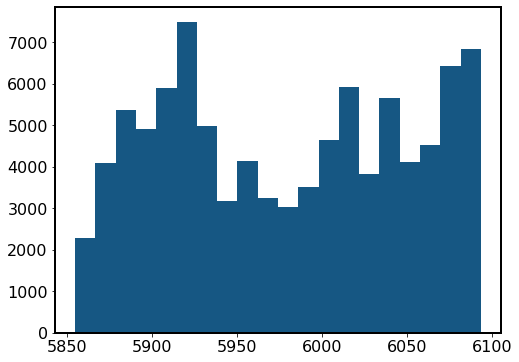

In [98]:
plt.hist(np.array(cartesian_halopos.compute())[:,0],bins=20)
plt.show()

In [79]:
np.array(cartesian_halopos.compute())

array([[5860.15396566,   49.25980441,   14.41247893],
       [5859.28504112,   49.2541523 ,   14.49441315],
       [5860.60863649,   48.43136477,   15.15863317],
       ...,
       [6092.66787856,  -28.37051481,   41.82511353],
       [6092.05630434,  -24.84810174,   37.74642247],
       [6092.65439572,  -24.17984244,   45.56065012]])

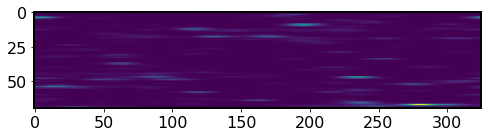

In [143]:
plt.imshow(maps[:,:,10])

In [35]:
getattr(LM,LC.models['CO_J43']['model_name'])(LC,SFR,LC.models['CO_J43']['model_pars'],LC.rng)

/home/jlbernal/preLIMinary/source/line_models.py:72: RuntimeWarning: divide by zero encountered in log10
  Lp = 10**((np.log10(LIR.value)-beta_par)/alpha_par)


<Quantity [8.06759383e+05, 7.54183481e+02, 3.66351022e+01, ...,
           2.53514282e+03, 4.08426734e+00, 4.21315843e+01] solLum>

In [38]:
LIR = (SFR/4.5e-44*u.erg/u.s).to(u.Lsun)

In [84]:
pars = LC.models['CO_J43']['model_pars']
alpha,beta,alpha_std,beta_std,sigma_L = pars['alpha'],pars['beta'],pars['alpha_std'],pars['beta_std'],pars['sigma_L']

inds = np.where(SFR>0)
L = np.zeros(len(SFR))*u.Lsun
LIR = (SFR[inds]*(1/4.5e-44)*u.erg/u.s).to(u.Lsun)

std = multivariate_normal(np.array([alpha,beta]),np.diag(np.array([alpha_std**2,beta_std**2])),LIR.shape)


alpha_par,beta_par = std[:,0],std[:,1]

Lp = 10**((np.log10(LIR.value)-beta_par)/alpha_par)

In [110]:
inds = np.where(SFR>0)
L = np.zeros(len(SFR))*u.Lsun
alpha,beta,alpha_std,beta_std,sigma_L = pars['alpha'],pars['beta'],pars['alpha_std'],pars['beta_std'],pars['sigma_L']

#Get the LIR from Kennicutt 1998, arXiv:9807187
LIR = SFR[inds]*(1/4.5e-44)*u.erg/u.s
LIR_norm = LIR*(1/1e41)

std = multivariate_normal(np.array([alpha,beta]),np.diag(np.array([alpha_std**2,beta_std**2])),LIR.shape)
alpha_par,beta_par = std[:,0],std[:,1]

Lerg_norm = 10**(alpha_par*np.log10(LIR_norm.value)-beta_par)
Lmean = (Lerg_norm*1e41*u.erg/u.s).to(u.Lsun)

#Add scatter to the relation
sigma_base_e = sigma_L*2.302585
L[inds] = Lmean*LC.rng.lognormal(-0.5*sigma_base_e**2, sigma_base_e, Lmean.shape)

In [124]:
grid_lim

array([[1942.84483253,  -16.95494999,  -16.95559561],
       [2464.71031847,   21.50920109,   21.51002013]])

In [8]:
ralim=np.asarray([LC.RAObs_min.value,LC.RAObs_max.value])
declim=np.asarray([LC.DECObs_min.value,LC.DECObs_max.value])
z_plot=np.asarray([LC.zmin, LC.zmax])
ra,dec  = np.deg2rad(ralim),np.deg2rad(declim)
x = np.cos(dec) * np.cos(ra)
y = np.cos(dec) * np.sin(ra)
z = np.sin(dec)
pos_lims = np.vstack([x,y,z]).T

r = ((LC.cosmo.comoving_radial_distance(z_plot)*u.Mpc).to(LC.Mpch)).value
grid_lim = r[:,None]*pos_lims

x=np.linspace(0, grid_lim[1,1]- grid_lim[0,1], LC.supersample*LC.Nside[0])
y=np.linspace(0, grid_lim[1,2]-grid_lim[0,2], LC.supersample*LC.Nside[1])

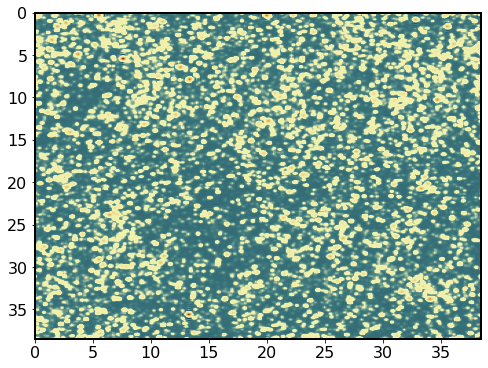

In [10]:
norm = clrs.TwoSlopeNorm(vcenter=0)
plt.imshow(CO_J43_map.preview(axes=[2,1]), extent=[x[0],x[-1], y[-1], y[0]], cmap=map_br,norm=norm,aspect='auto')


In [136]:
x

array([ 0.        ,  0.11871652,  0.23743303,  0.35614955,  0.47486606,
        0.59358258,  0.71229909,  0.83101561,  0.94973213,  1.06844864,
        1.18716516,  1.30588167,  1.42459819,  1.5433147 ,  1.66203122,
        1.78074774,  1.89946425,  2.01818077,  2.13689728,  2.2556138 ,
        2.37433031,  2.49304683,  2.61176335,  2.73047986,  2.84919638,
        2.96791289,  3.08662941,  3.20534592,  3.32406244,  3.44277895,
        3.56149547,  3.68021199,  3.7989285 ,  3.91764502,  4.03636153,
        4.15507805,  4.27379456,  4.39251108,  4.5112276 ,  4.62994411,
        4.74866063,  4.86737714,  4.98609366,  5.10481017,  5.22352669,
        5.34224321,  5.46095972,  5.57967624,  5.69839275,  5.81710927,
        5.93582578,  6.0545423 ,  6.17325882,  6.29197533,  6.41069185,
        6.52940836,  6.64812488,  6.76684139,  6.88555791,  7.00427443,
        7.12299094,  7.24170746,  7.36042397,  7.47914049,  7.597857  ,
        7.71657352,  7.83529004,  7.95400655,  8.07272307,  8.19

In [ ]:
LC.update(lines=dict(CO_J54=True),
          models=dict(CO_J54=dict(model_name='CO_lines_scaling_LFIR',
                        model_pars={'alpha':1.05,'alpha_std':0.03,'beta':1.8,'beta_std':0.3,'sigma_L':0.3})),)
CO_J54_map=LC.obs_3d_map
